In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline

In [5]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [24]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020, 12, 20)
bili = web.DataReader('BILI', 'yahoo', start, end)
bili['Est Cost'] = (bili['Open'] + bili['Adj Close']) / 2 * bili['Volume'] / 1000000

In [25]:
bili.tail()

,High,Low,Open,Close,Volume,Adj Close,Est Cost
Date,,,,,,,
2020-12-14,80.870003,77.040001,78.405998,78.199997,5022600,78.199997,393.284636
2020-12-15,80.800003,76.000000,80.650002,76.660004,3899900,76.660004,306.746645
2020-12-16,81.809998,77.970001,77.970001,78.830002,3695300,78.830002,289.711526
2020-12-17,82.839996,78.599998,79.410004,82.190002,3776100,82.190002,305.108892
2020-12-18,86.599998,83.150002,84.190002,84.680000,6029000,84.680000,509.058623


In [26]:
huya = web.DataReader('HUYA', 'yahoo', start, end)
huya['Est Cost'] = (huya['Open'] + huya['Adj Close']) / 2 * huya['Volume'] / 1000000
iq = web.DataReader('IQ', 'yahoo', start, end)
iq['Est Cost'] = (iq['Open'] + iq['Adj Close']) / 2 * iq['Volume'] / 1000000

In [27]:
bili

,High,Low,Open,Close,Volume,Adj Close,Est Cost
Date,,,,,,,
2018-03-28,11.260000,9.620000,9.800000,11.240000,23929600,11.240000,251.739392
2018-03-29,11.800000,10.650000,11.500000,11.000000,5863900,11.000000,65.968875
2018-04-02,11.500000,10.910000,11.050000,11.000000,2771000,11.000000,30.550275
2018-04-03,11.500000,10.791000,11.500000,10.910000,2509600,10.910000,28.120068
2018-04-04,11.080000,10.550000,10.750000,10.970000,1498200,10.970000,16.270452
...,...,...,...,...,...,...,...
2020-12-14,80.870003,77.040001,78.405998,78.199997,5022600,78.199997,393.284636
2020-12-15,80.800003,76.000000,80.650002,76.660004,3899900,76.660004,306.746645
2020-12-16,81.809998,77.970001,77.970001,78.830002,3695300,78.830002,289.711526


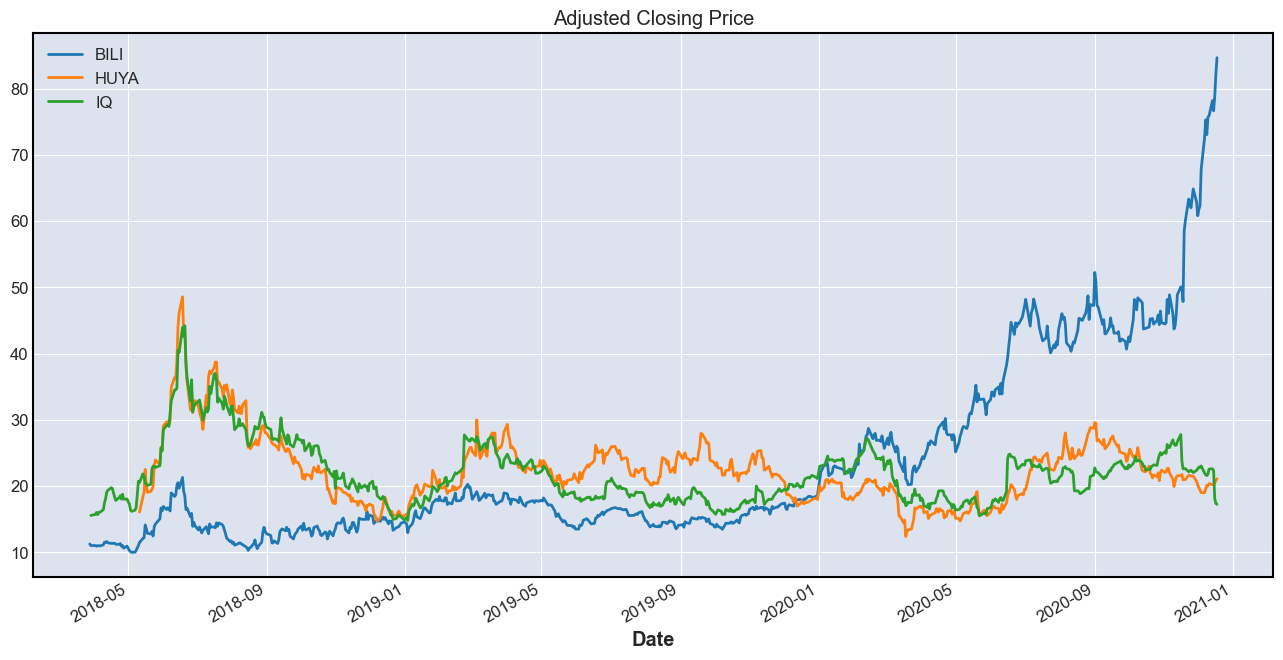

In [28]:
bili['Adj Close'].plot(label='BILI', figsize=(16, 8), title='Adjusted Closing Price')
huya['Adj Close'].plot(label='HUYA')
iq['Adj Close'].plot(label='IQ')
plt.legend()

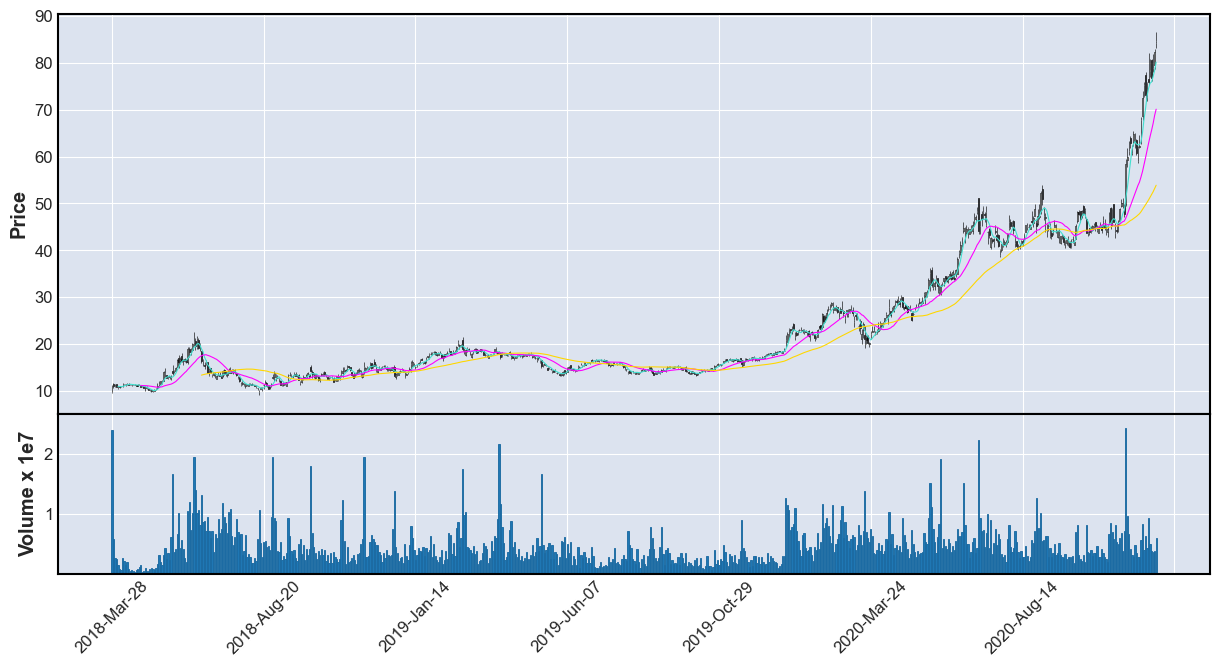

In [29]:
mpf.plot(bili, type='candle', mav=(5,20,60), volume=True, figsize=(16, 8))

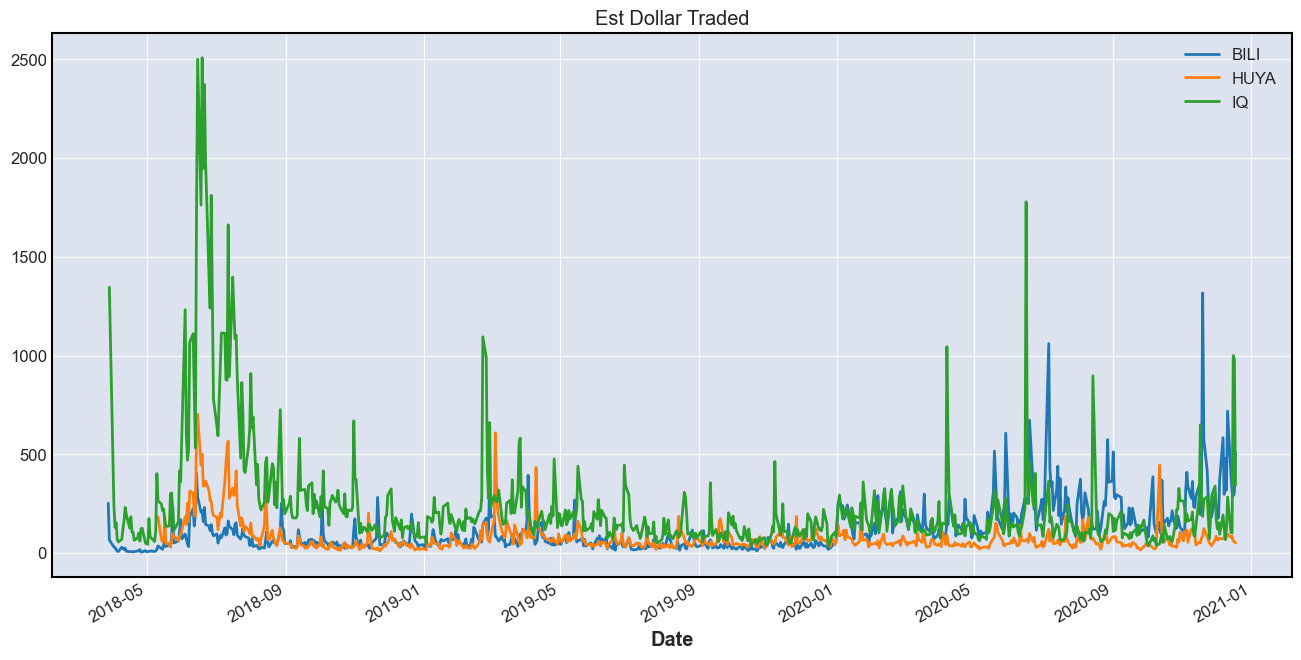

In [31]:
bili['Est Cost'].plot(label='BILI', figsize=(16,8), title='Est Dollar Traded')
huya['Est Cost'].plot(label='HUYA')
iq['Est Cost'].plot(label='IQ')
plt.legend()

In [32]:
bili.idxmax()

High        2020-12-18
Low         2020-12-18
Open        2020-12-18
Close       2020-12-18
Volume      2020-11-19
Adj Close   2020-12-18
Est Cost    2020-11-19
dtype: datetime64[ns]

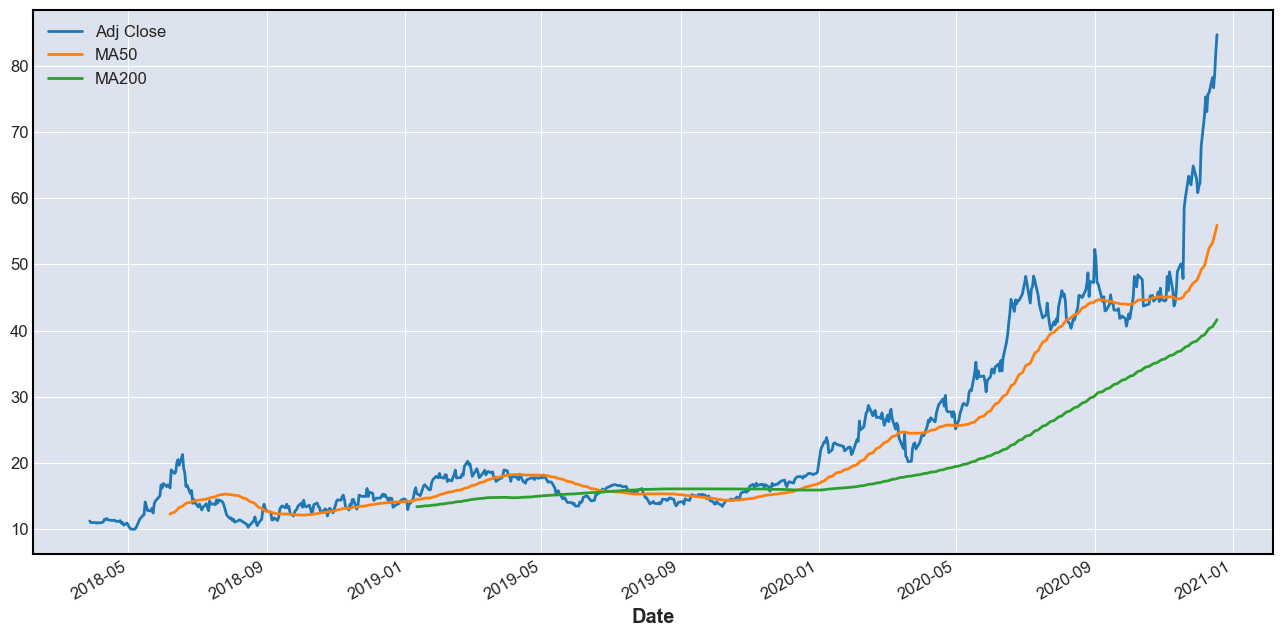

In [33]:
bili['MA50'] = bili['Adj Close'].rolling(50).mean()
bili['MA200'] = bili['Adj Close'].rolling(200).mean()
bili[['Adj Close', 'MA50', 'MA200']].plot(label='BILI', figsize=(16,8))

In [1]:
import yfinance as yf
import altair as alt
alt.renderers.enable('mimetype')


RendererRegistry.enable('mimetype')

In [34]:
bili = yf.Ticker('BILI')
df = bili.history(period='3mo').reset_index()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-10-01,42.349998,43.020000,41.630001,42.509998,3063400,0,0
1,2020-10-02,41.200001,42.250000,41.099998,41.799999,1936100,0,0
2,2020-10-05,42.500000,45.549999,42.400002,45.099998,7036100,0,0
3,2020-10-06,46.250000,48.450001,45.790001,48.169998,8172000,0,0
4,2020-10-07,48.130001,48.700001,47.470001,47.669998,3126300,0,0
...,...,...,...,...,...,...,...,...
59,2020-12-24,81.709999,83.230003,78.599998,82.010002,3531700,0,0
60,2020-12-28,82.033997,83.720001,78.879997,81.379997,3433100,0,0
61,2020-12-29,82.300003,84.540001,81.129997,82.449997,3004800,0,0
62,2020-12-30,87.070000,95.709999,86.779999,94.349998,9775600,0,0


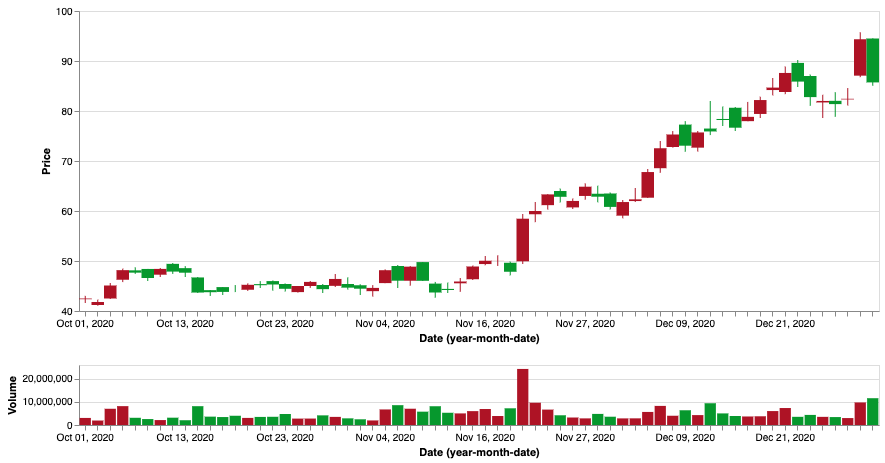

In [53]:
open_close_color = alt.condition('datum.Open >= datum.Close', alt.value('#06982d'), alt.value('#ae1325'))
brush = alt.selection(type='interval', encodings=['x'])
x='yearmonthdate(Date):O'
base = alt.Chart(df).encode(alt.X(x), color=open_close_color).properties(width=800)
rule = base.mark_rule().encode(
    alt.Y('Low:Q', title='Price', scale=alt.Scale(zero=False)),
    alt.Y2('High:Q'),
)
bar = base.mark_bar().encode(
    alt.Y('Open:Q'),
    alt.Y2('Close:Q')
)

volume = base.mark_bar().encode(alt.Y('Volume:Q')).properties(height=60)

((rule + bar).interactive() & volume)



# lower = alt.layer(volume, height=60).add_selection(brush)
# upper = (rule + bar).encode(
#     alt.X(x, scale=alt.Scale(domain=brush))    
# )

# (upper & lower)

In [ ]:
alt